# ロジスティック回帰
目的変数が二値をとる場合に用いられる回帰モデル

## シグモイド関数
変数 $x$ がある一定値以下のとき$y$が1である割合が0となり、$x$ がある一定値以上のとき$y$が1である割合が1となる関数

下記の式で表される
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

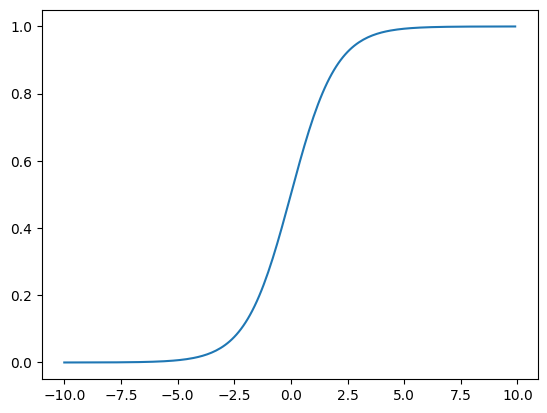

In [4]:
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + math.e**-x)

plt.plot(x, y)
plt.show()

ある定数 $a$, $b$ を用いて、下記の関数を考えるとさまざまな曲線を表現することができる
$$
p(x) = \sigma(ax + b)
$$

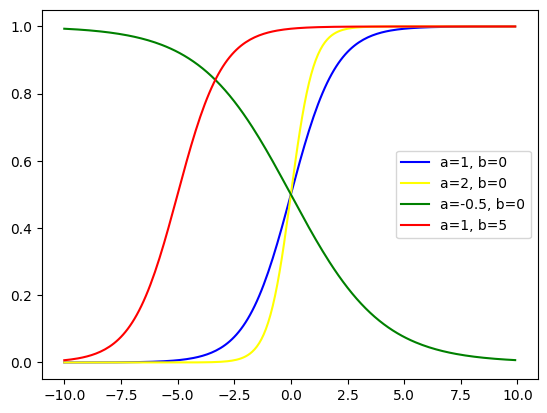

In [7]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(x)), color='blue', label='a=1, b=0')
plt.plot(x, 1 / (1 + math.e**-(2 * x)), color='yellow', label='a=2, b=0')
plt.plot(x, 1 / (1 + math.e**-(-0.5 * x)), color='green', label='a=-0.5, b=0')
plt.plot(x, 1 / (1 + math.e**-(x + 5)), color='red', label='a=1, b=5')
plt.legend()
plt.show()

ロジスティック回帰では $y$ は確率 $p(x)$ で1, $1-p(x)$で0となる確率変数であると設定する  
このようにすると、 $p(x) = \sigma(ax+b)$ が小さいところではほとんどの $y$ は0となり、大きいところではほとんどの $y$ は1となることを表現することできる  
この設定のもとで最もデータに当てはまる $a$, $b$ を見つける

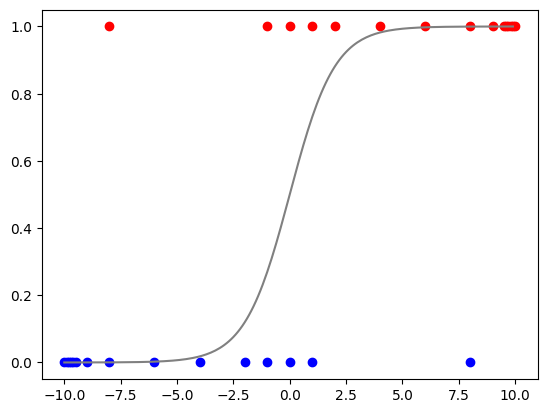

In [12]:
positive = np.array([-1, 0, 1, 2, 4, 6, 8, 9, 9.5, 9.6, 9.7, 9.8, 9.9, 10, -8])
negative = np.array([-1, 0, 1, -2, -4, -6, -8, -9, -9.5, -9.6, -9.7, -9.8, -9.9, -10, 8])
plt.scatter(positive, np.ones(len(positive)), color='red')
plt.scatter(negative, np.zeros(len(negative)), color='blue')

x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(x)), color='grey')

## 尤度
確率変数 $y$ に関する確率関数が、実際に抽出されたサンプルに対してどのくらい一致しているかの指標  
$y = p(x) = \sigma(ax + b)$ のもとで互いに独立な$N$個のサンプルの同時分布を考えると
$$
\begin{eqnarray}
p(y_1 | x_1)p(y_2 | x_2)\cdots{p(y_N | x_N)} &=& \prod_{i=1}^{N}{p(x_i)}^{y_i}(1-{p(x_i)})^{1-y_i} \\
&=& \prod_{i=1}^{N}{\sigma(ax_i+b)}^{y_i}(1-{\sigma(ax_i+b)})^{1-y_i}
\end{eqnarray}
$$
ここで $x_i$, $y_i$ は抽出されたサンプルの値（=定数）であるため、この値は $a$, $b$ を変数と見ることができる
$$
\mathcal{L}(a, b) = \prod_{i=1}^{N}{\sigma(ax_i+b)}^{y_i}(1-{\sigma(ax_i+b)})^{1-y_i}
$$
この$\mathcal{L}(a, b)$ を尤度と呼ぶ  

ロジスティック回帰ではこの尤度を最大にするパラメータ $a$, $b$ を最良のパラメータと考えこれを探す

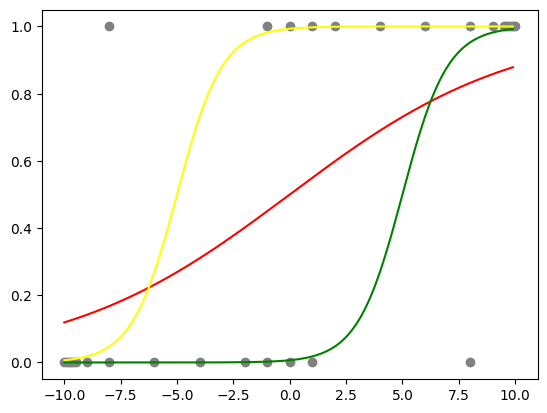

In [18]:
plt.scatter(positive, np.ones(len(positive)), color='grey')
plt.scatter(negative, np.zeros(len(negative)), color='grey')

x = np.arange(-10, 10, 0.1)
plt.plot(x, 1 / (1 + math.e**-(0.2 * x)), color='red')
plt.plot(x, 1 / (1 + math.e**-(x + 5)), color='yellow')
plt.plot(x, 1 / (1 + math.e**-(x - 5)), color='green')

## シグモイド関数の微分
$$
\frac{\partial}{\partial{x}}{\sigma(x)} = (1 - \sigma(x))\sigma(x)
$$